<a href="https://colab.research.google.com/github/amplabs-ai/amplabs/blob/main/MRS_Sandia_AmpLabs_Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MRS - Sandia AmpLabs Example 1





In this demo you will learn how to:

1. Fetch battery data from **AmpLabs JSON API**
2. Create new metrics and add them as new columns using **Pandas**
3. Plot graphs using **Plotly**


We will use the following Python libraries and tools

**Pandas** is an easy-to-use data structures and data analysis tools for the Python programming language. In Pandas, we can import data from various file formats like JSON, SQL, Microsoft Excel, etc. When working with tabular data, such as data stored in spreadsheets or databases, pandas will help you to explore, clean, and process your data. In pandas, a data table is called a **Data Frame**.

Note: Pandas is built off of another library called **NumPy**. 

**Plotly** The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases. Kaleido is a library for generating static images used in conjunction with Plotly



In [1]:
# Download python packages to your system using pip install
import sys
!{sys.executable} -m pip install pandas plotly kaleido requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 120 kB/s 


Import the libraries we downloaded into the Python environment


In [2]:
# Useful for fetching data from the web 

import json
import requests
import gzip

# PyData Libraries

import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import kaleido

# Library useful for rendering Images and suppressing warnings in Jupyter Notebooks

from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

After uploading data to https://www.app.amplabs.ai we will build functions that will help us fetch, manipulate and plot our data

# **1. Fetch Data from AmpLabs JSON API**


# Key Terms

**API** Application Programming Interface is a set of definitions and protocols for building and integrating application software. AmpLabs provides an API to help you access and control your data.

**JavaScript Object Notation** is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate. Win/Win

[JSON](https://www.json.org/json-en.html) is commonly used as an output format from websites. AmpLabs provides a JSON API for your Battery Data. Records for your battery data look like the following: 

``` JSON
{
    "detail": "Records Retrieved",
    "records": [
        [
            {
                "charge_step_count": null,
                "cycle_charge_capacity": 1.026650590728431,
                "cycle_charge_energy": 3.5721314343688153,
                "cycle_coulombic_efficiency": 1.0020317221497879,
                "cycle_discharge_capacity": 1.0287364594737067,
                "cycle_discharge_energy": 3.129065924887601,
                "cycle_duration": 2529.3717,
                "cycle_end_timestamp": "2022-09-06T17:42:31.223598Z",
                "cycle_energy_efficiency": 0.8759660674245312,
                "cycle_index": 1,
                "cycle_max_charge_power": 23.36383866394476,
                "cycle_max_current": 6.6025085,
                "cycle_max_discharge_power": 15.200998988505711,
                "cycle_max_power": 23.36383866394476,
                "cycle_max_rest_voltage": 3.5980968,
                "cycle_max_voltage": 3.6001949,
                "cycle_mean_charge_power": 9.714367248195945,
                "cycle_mean_charge_voltage": 3.3811619645885287,
                "cycle_mean_discharge_power": -10.992575217325712,
                "cycle_mean_discharge_voltage": 2.793457597077922,
                "cycle_mean_power": 0.703100827021039,
                "cycle_mean_voltage": 3.1228079950344827,
                "cycle_min_charge_power": 0.15608810761640943,
                "cycle_min_current": -4.4012828,
                "cycle_min_discharge_power": 0.109924433457156,
                "cycle_min_power": 0.0,
                "cycle_min_rest_voltage": 2.0303135,
                "cycle_min_voltage": 1.9997959,
                "cycle_resistance_end_of_charge": 0.197672471838036,
                "cycle_resistance_end_of_discharge": -0.1099885647713824,
                "cycle_resistance_start_of_charge": 0.993497447188566,
                "cycle_resistance_start_of_discharge": -1.89296425266147,
                "cycle_start_timestamp": "2022-09-06T17:00:21.851898Z",
                "cycle_time": null,
                "cycle_total_rest_time": 105613.492,
                "cycle_voltage_efficiency": null,
                "datapoint_count": 725,
                "discharge_step_count": null,
                "dt_end_of_charge": 2.1689000000005763,
                "dt_end_of_discharge": 3.8768999999992957,
                "dt_start_of_charge": 0.0,
                "dt_start_of_discharge": 0.16220000000066648,
                "dv_end_of_charge": -0.0001811999999996594,
                "dv_end_of_discharge": 9.14999999999111e-05,
                "dv_start_of_charge": 0.0,
                "dv_start_of_discharge": -0.010403600000000068,
                "rest_step_count": null,
                "step_count": null,
                "test_time": 7527.4484
            },
        ]
    ],
    "status": 200
}
```

**Data Frame**. A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:
[Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)



``` Python
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
```





# Define Helper Function

The following section defines a function that will fetch data from the AmpLabs JSON API and returns the JSON response for further processing.

In [3]:
def get_amplabs_cycledata(user_token, cell_id):
    url = "https://www.app.amplabs.ai/download/cells/cycle_data_json?cell_id={}".format(cell_id.replace('/','%2F'))
    headers = {
    "Authorization": "Bearer {}".format(user_token),
    }
    try:
        response = requests.request("GET", url, headers=headers)
        res =  json.loads(response.text)
        response = requests.request("GET",res["response_url"])
        response = gzip.decompress(response.content)
        return json.loads(response.decode()), 1
    except requests.exceptions.RequestException as e:
        print(e)
    return None,0

New Native Python function: **enumerate**

When iterating through an array in python, you may need to keep track of the index in the list and the value at that index. If you have trouble recalling whether the index starts at 0 or 1, you can use enumerate to handle the complexity. By inputting a list, enumerate returns an iterator that produces 2 values per iteration:
1) the current index 
2) value of the list at that iteration

Now there is no need to worry about off-by-one errors involving list indexing and for loops.



# Fetch Data

In [4]:
#Bearer Token
user_token = '<token>' 

cell_ids = ['SNL_18650_NMC_15C_0-100_0.5/1C_a',
            'SNL_18650_NMC_25C_0-100_0.5/1C_a',
            'SNL_18650_NMC_35C_0-100_0.5/1C_a']

In [8]:
dfs = {}
for idx, cell_id in enumerate(cell_ids): 
  print("Fetching {}...".format(cell_id), end = '')
  response, status = get_amplabs_cycledata(user_token, cell_id) # Fetch Cycle Data from AmpLabs JSON API
  print(response)
  output = pd.DataFrame(response['records'][0])  # Convert JSON Records to DataFrame
  output = output.set_index(output['cycle_index']) # Change DataFrame index to Cycle Index
  dfs[cell_id] = output.head(500) # Take the first 500 rows and put into a dictionary
  print("done.")

Fetching SNL_18650_NMC_15C_0-100_0.5/1C_a...{'detail': 'Records Retrieved', 'records': [[{'Charge_Capacity (Ah)': 2.559, 'Charge_Energy (Wh)': 10.015, 'Cycle_Index': 1, 'Discharge_Capacity (Ah)': 2.697, 'Discharge_Energy (Wh)': 9.4, 'End_Time': None, 'Max_Current (A)': 1.496, 'Max_Voltage (V)': 4.2, 'Min_Current (A)': -1.503, 'Min_Voltage (V)': 1.999, 'Start_Time': None, 'Test_Time (s)': 14644.703}, {'Charge_Capacity (Ah)': 2.701, 'Charge_Energy (Wh)': 10.485, 'Cycle_Index': 2, 'Discharge_Capacity (Ah)': 2.697, 'Discharge_Energy (Wh)': 9.408, 'End_Time': None, 'Max_Current (A)': 1.496, 'Max_Voltage (V)': 4.2, 'Min_Current (A)': -1.503, 'Min_Voltage (V)': 1.999, 'Start_Time': None, 'Test_Time (s)': 29574.64}, {'Charge_Capacity (Ah)': 2.697, 'Charge_Energy (Wh)': 10.466, 'Cycle_Index': 3, 'Discharge_Capacity (Ah)': 2.691, 'Discharge_Energy (Wh)': 9.392, 'End_Time': None, 'Max_Current (A)': 1.496, 'Max_Voltage (V)': 4.2, 'Min_Current (A)': -1.503, 'Min_Voltage (V)': 1.999, 'Start_Time': N

In [9]:
print(dfs['SNL_18650_NMC_15C_0-100_0.5/1C_a'].shape)
dfs['SNL_18650_NMC_15C_0-100_0.5/1C_a'].head()

(500, 49)


charge_step_count  cycle_charge_capacity  cycle_charge_energy  \
cycle_index                                                                 
1                        None                  2.559               10.015   
2                        None                  2.701               10.485   
3                        None                  2.697               10.466   
4                        None                  5.359               20.802   
5                        None                  2.661               10.316   

             cycle_coulombic_efficiency  cycle_discharge_capacity  \
cycle_index                                                         
1                              1.053927                     2.697   
2                              0.998519                     2.697   
3                              0.997775                     2.691   
4                              0.994775                     5.331   
5                              0.996618                     2.652   

             cycle_discharge_energy  cycle_duration  \
cycle_index                                           
1                             9.400       14634.699   
2                             9.408       14929.843   
3                             9.392       14905.378   
4                            17.928       22625.631   
5                             8.927       10832.958   

                     cycle_end_timestamp  cycle_energy_efficiency  \
cycle_index                                                         
1            2022-09-06T21:50:10.172959Z                 0.938592   
2            2022-09-07T01:59:00.109959Z                 0.897282   
3            2022-09-07T06:07:25.519959Z                 0.897382   
4            2022-09-07T12:24:31.150959Z                 0.861840   
5            2022-09-07T15:27:04.129959Z                 0.865355   

             cycle_index    ...      dt_end_of_discharge  dt_start_of_charge  \
cycle_index                 ...                                                
1                      1    ...                    0.375               0.001   
2                      2    ...                    0.375               0.001   
3                      3    ...                    0.375               0.001   
4                      4    ...                    0.375               0.001   
5                      5    ...                    0.375               0.001   

             dt_start_of_discharge  dv_end_of_charge  dv_end_of_discharge  \
cycle_index                                                                 
1                            0.062               0.0                -0.01   
2                            0.062               0.0                -0.01   
3                            0.062               0.0                -0.01   
4                            0.062               0.0                -0.01   
5                            0.062               0.0                -0.01   

             dv_start_of_charge  dv_start_of_discharge  rest_step_count  \
cycle_index                                                               
1                         0.129                 -0.109             None   
2                         0.129                 -0.109             None   
3                         0.129                 -0.109             None   
4                         0.129                 -0.109             None   
5                         0.129                 -0.109             None   

             step_count  test_time  
cycle_index                         
1                  None  14644.703  
2                  None  29574.640  
3                  None  44480.050  
4                  None  67105.681  
5                  None  78058.660  

[5 rows x 49 columns]

In [10]:
print(dfs['SNL_18650_NMC_25C_0-100_0.5/1C_a'].shape)
dfs['SNL_18650_NMC_25C_0-100_0.5/1C_a'].head()

(500, 49)


charge_step_count  cycle_charge_capacity  cycle_charge_energy  \
cycle_index                                                                 
1                        None                  2.882               11.085   
2                        None                  2.968               11.349   
3                        None                  2.960               11.318   
4                        None                  5.881               22.497   
5                        None                  2.919               11.164   

             cycle_coulombic_efficiency  cycle_discharge_capacity  \
cycle_index                                                         
1                              1.029493                     2.967   
2                              0.997305                     2.960   
3                              0.997297                     2.952   
4                              0.994219                     5.847   
5                              0.996917                     2.910   

             cycle_discharge_energy  cycle_duration  \
cycle_index                                           
1                            10.636       16430.744   
2                            10.622       16584.205   
3                            10.601       16551.197   
4                            20.609       25254.284   
5                            10.265       12141.477   

                     cycle_end_timestamp  cycle_energy_efficiency  \
cycle_index                                                         
1            2022-09-06T22:22:51.625219Z                 0.959495   
2            2022-09-07T02:59:15.893219Z                 0.935941   
3            2022-09-07T07:35:07.217219Z                 0.936650   
4            2022-09-07T14:36:01.501219Z                 0.916078   
5            2022-09-07T18:00:23.006219Z                 0.919473   

             cycle_index    ...      dt_end_of_discharge  dt_start_of_charge  \
cycle_index                 ...                                                
1                      1    ...                     0.28               0.032   
2                      2    ...                     0.28               0.032   
3                      3    ...                     0.28               0.032   
4                      4    ...                     0.28               0.032   
5                      5    ...                     0.28               0.032   

             dt_start_of_discharge  dv_end_of_charge  dv_end_of_discharge  \
cycle_index                                                                 
1                            0.032               0.0               -0.005   
2                            0.032               0.0               -0.005   
3                            0.032               0.0               -0.005   
4                            0.032               0.0               -0.005   
5                            0.032               0.0               -0.005   

             dv_start_of_charge  dv_start_of_discharge  rest_step_count  \
cycle_index                                                               
1                         0.058                 -0.056             None   
2                         0.058                 -0.056             None   
3                         0.058                 -0.056             None   
4                         0.058                 -0.056             None   
5                         0.058                 -0.056             None   

             step_count  test_time  
cycle_index                         
1                  None  16440.748  
2                  None  33025.016  
3                  None  49576.340  
4                  None  74830.624  
5                  None  87092.129  

[5 rows x 49 columns]

In [11]:
print(dfs['SNL_18650_NMC_35C_0-100_0.5/1C_a'].shape)
dfs['SNL_18650_NMC_35C_0-100_0.5/1C_a'].head()

(500, 49)


charge_step_count  cycle_charge_capacity  cycle_charge_energy  \
cycle_index                                                                 
1                        None                  2.863               11.098   
2                        None                  2.970               11.427   
3                        None                  2.958               11.383   
4                        None                  5.861               22.580   
5                        None                  2.906               11.192   

             cycle_coulombic_efficiency  cycle_discharge_capacity  \
cycle_index                                                         
1                              1.034928                     2.963   
2                              0.994276                     2.953   
3                              0.994929                     2.943   
4                              0.992834                     5.819   
5                              0.995182                     2.892   

             cycle_discharge_energy  cycle_duration  \
cycle_index                                           
1                            10.484       15988.058   
2                            10.465       16180.845   
3                            10.439       16129.711   
4                            19.995       24370.781   
5                             9.955       11804.170   

                     cycle_end_timestamp  cycle_energy_efficiency  \
cycle_index                                                         
1            2022-09-02T19:52:54.972869Z                 0.944675   
2            2022-09-03T00:22:35.835869Z                 0.915813   
3            2022-09-03T04:51:25.565869Z                 0.917069   
4            2022-09-03T11:37:36.362869Z                 0.885518   
5            2022-09-03T14:54:20.548869Z                 0.889475   

             cycle_index    ...      dt_end_of_discharge  dt_start_of_charge  \
cycle_index                 ...                                                
1                      1    ...                    0.134               0.098   
2                      2    ...                    0.134               0.098   
3                      3    ...                    0.134               0.098   
4                      4    ...                    0.134               0.098   
5                      5    ...                    0.134               0.098   

             dt_start_of_discharge  dv_end_of_charge  dv_end_of_discharge  \
cycle_index                                                                 
1                            0.108               0.0               -0.003   
2                            0.108               0.0               -0.003   
3                            0.108               0.0               -0.003   
4                            0.108               0.0               -0.003   
5                            0.108               0.0               -0.003   

             dv_start_of_charge  dv_start_of_discharge  rest_step_count  \
cycle_index                                                               
1                         0.106                 -0.099             None   
2                         0.106                 -0.099             None   
3                         0.106                 -0.099             None   
4                         0.106                 -0.099             None   
5                         0.106                 -0.099             None   

             step_count  test_time  
cycle_index                         
1                  None  15998.063  
2                  None  32178.926  
3                  None  48308.656  
4                  None  72679.453  
5                  None  84483.639  

[5 rows x 49 columns]

# Plot Energy Throughput Histogram


We define a new function that we will use to generate our energy histogram and write to file.

In [12]:
def write_energy_throughput_histogram_to_file(df, filename):
  df['cycle_discharge_energy'] = pd.to_numeric(df['cycle_discharge_energy'])
  fig = px.histogram(df, 
                     x='cell_id', 
                     y='cycle_discharge_energy', 
                     color='cell_id', 
                     labels={ 
                         'cell_id': 'Cell', 
                         'cycle_discharge_energy': 'Discharge Energy Throughput, 500 cyc (Wh)'
                         })
  pio.write_image(fig, file=filename, format='png', width=1200, height=800)
  print("./Discharge_energy_throughput_histogram.png updated")

Loop through each cell in the cell_id list, concat, and produce the histogram

In [13]:
df = pd.DataFrame()

for cell_id in cell_ids:
  data = dfs[cell_id]
  data['cell_id'] = [cell_id] * len(data) # Add cell_id as a column to DataFrame in order for it to appear on plot
  df = pd.concat([df, data])

write_energy_throughput_histogram_to_file(df, './Discharge_energy_throughput_histogram.png')

./Discharge_energy_throughput_histogram.png updated


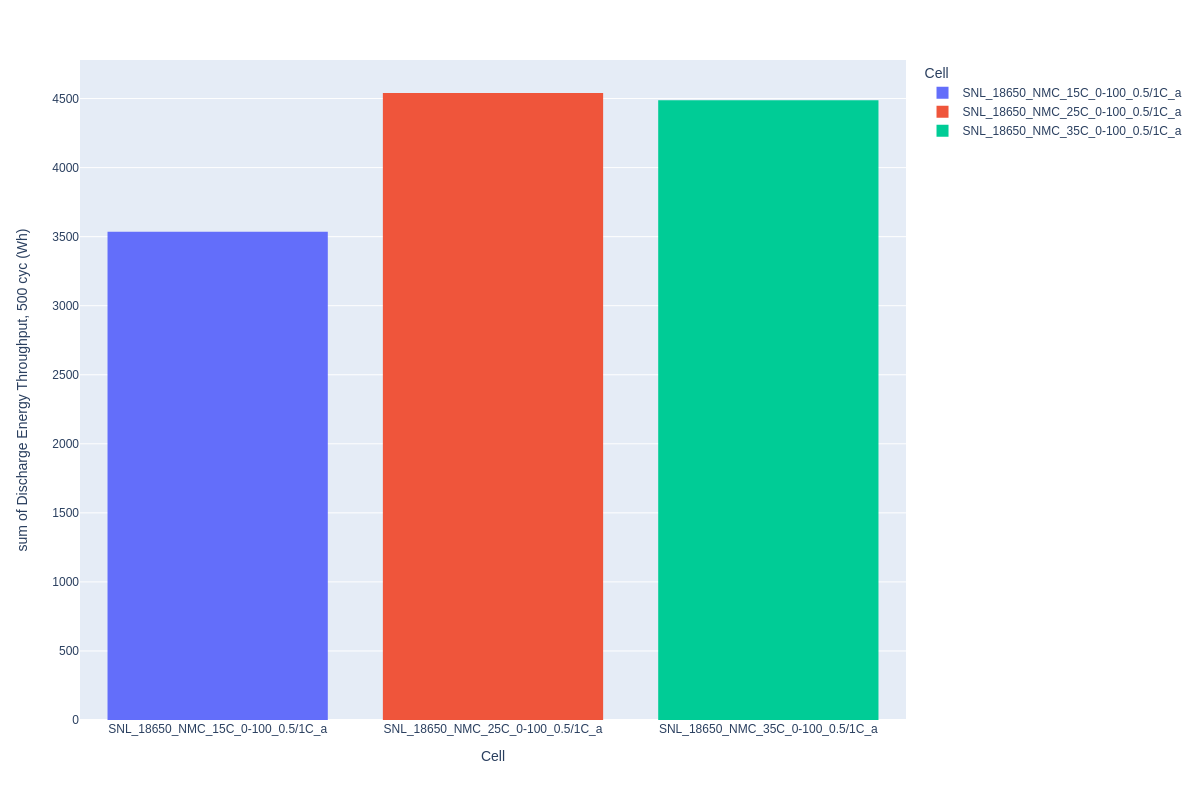

In [14]:
Image(filename='Discharge_energy_throughput_histogram.png') 

# Plot Energy Throughput Line Graphs

 We define a new function that we will use to 
generate our energy throughput linegraphs and write them to file.

In [15]:
def write_energy_throughput_linegraph_to_file(df, filename):
    fig = px.line(df, 
                  x='cycle_index', 
                  y=[
                     'Discharge Energy Throughput (Wh)', 
                     'Charge Energy Throughput (Wh)'
                     ], 
                  labels={
                      'cycle_index': 'Cycle'
                      })
    fig.update_traces(mode='markers+lines')
    pio.write_image(fig, file=filename, format='png', width=1200, height=800)
    print("./{} updated".format(filename)) 

If we want to graph Energy Throughput given our original schema we see throughput can be derived by taking the cumulative sum of Charge and Discharge Energy accordingly. With pandas this is made trivial with the cumulative sum function, **cumsum()**.

**Original Schema**
1. charge_step_count
2. cycle_charge_capacity
3. cycle_charge_energy
4. cycle_coulombic_efficiency
5. cycle_discharge_capacity
6. cycle_discharge_energy
7. cycle_duration
8. cycle_end_timestamp
9. cycle_energy_efficiency
10. cycle_index
11. cycle_max_charge_power
12. cycle_max_current
13. cycle_max_discharge_power
14. cycle_max_power
15. cycle_max_rest_voltage
16. cycle_max_voltage
17. cycle_mean_charge_power
18. cycle_mean_charge_voltage
19. cycle_mean_discharge_power
20. cycle_mean_discharge_voltage
21. cycle_mean_power
22. cycle_mean_voltage
23. cycle_min_charge_power
24. cycle_min_current
25. cycle_min_discharge_power
26. cycle_min_power
27. cycle_min_rest_voltage
28. cycle_min_voltage
29. cycle_resistance_end_of_charge
30. cycle_resistance_end_of_discharge
31. cycle_resistance_start_of_charge
32. cycle_resistance_start_of_discharge
33. cycle_start_timestamp
34. cycle_time
35. cycle_total_rest_time
36. cycle_voltage_efficiency
37. datapoint_count
38. discharge_step_count
39. dt_end_of_charge
40. dt_end_of_discharge
41. dt_start_of_charge
42. dt_start_of_discharge
43. dv_end_of_charge
44. dv_end_of_discharge
45. dv_start_of_charge
46. dv_start_of_discharge
47. rest_step_count
48. step_count
49. test_time
	


In [16]:
for cell_id in cell_ids:
  dfs[cell_id]['Discharge Energy Throughput (Wh)'] = dfs[cell_id]['cycle_discharge_energy'].cumsum() # create new column called Discharge Energy Throughput (Wh) to be the cumulative sum of Discharge Energy
  dfs[cell_id]['Charge Energy Throughput (Wh)'] = dfs[cell_id]['cycle_charge_energy'].cumsum() # create new column called Charge Energy Throughput (Wh) to be the cumulative sum of Charge Energy
  filename = 'Energy_throughput_' + cell_id.replace('/','-') + '.png'
  write_energy_throughput_linegraph_to_file(dfs[cell_id], filename)


./Energy_throughput_SNL_18650_NMC_15C_0-100_0.5-1C_a.png updated
./Energy_throughput_SNL_18650_NMC_25C_0-100_0.5-1C_a.png updated
./Energy_throughput_SNL_18650_NMC_35C_0-100_0.5-1C_a.png updated


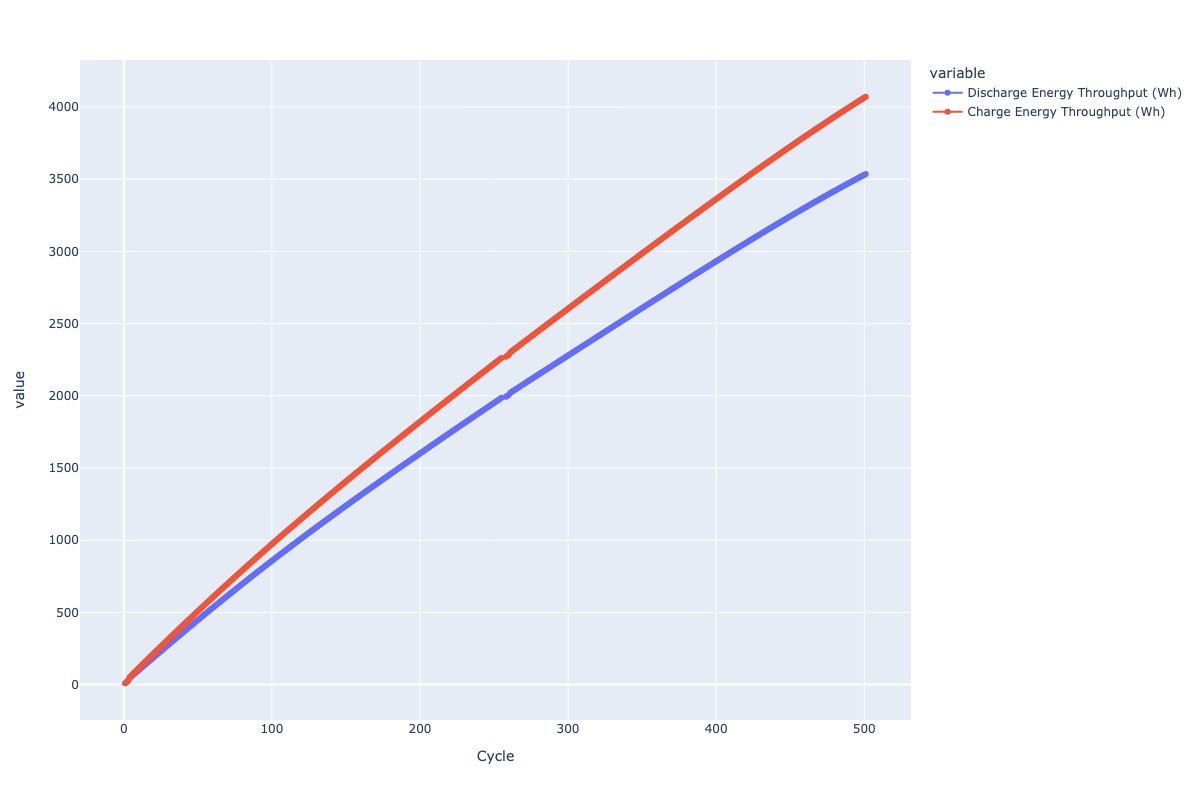

In [17]:
Image(filename='Energy_throughput_SNL_18650_NMC_15C_0-100_0.5-1C_a.png')

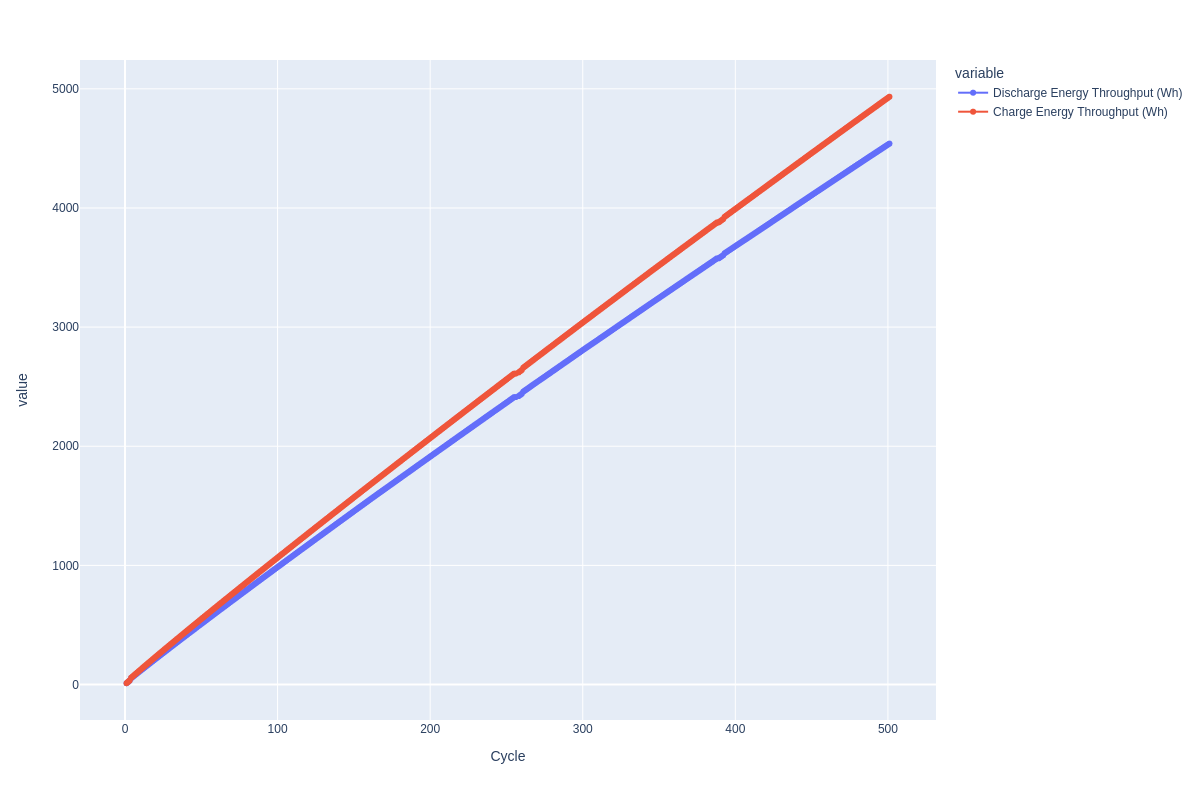

In [18]:
Image(filename='Energy_throughput_SNL_18650_NMC_25C_0-100_0.5-1C_a.png')

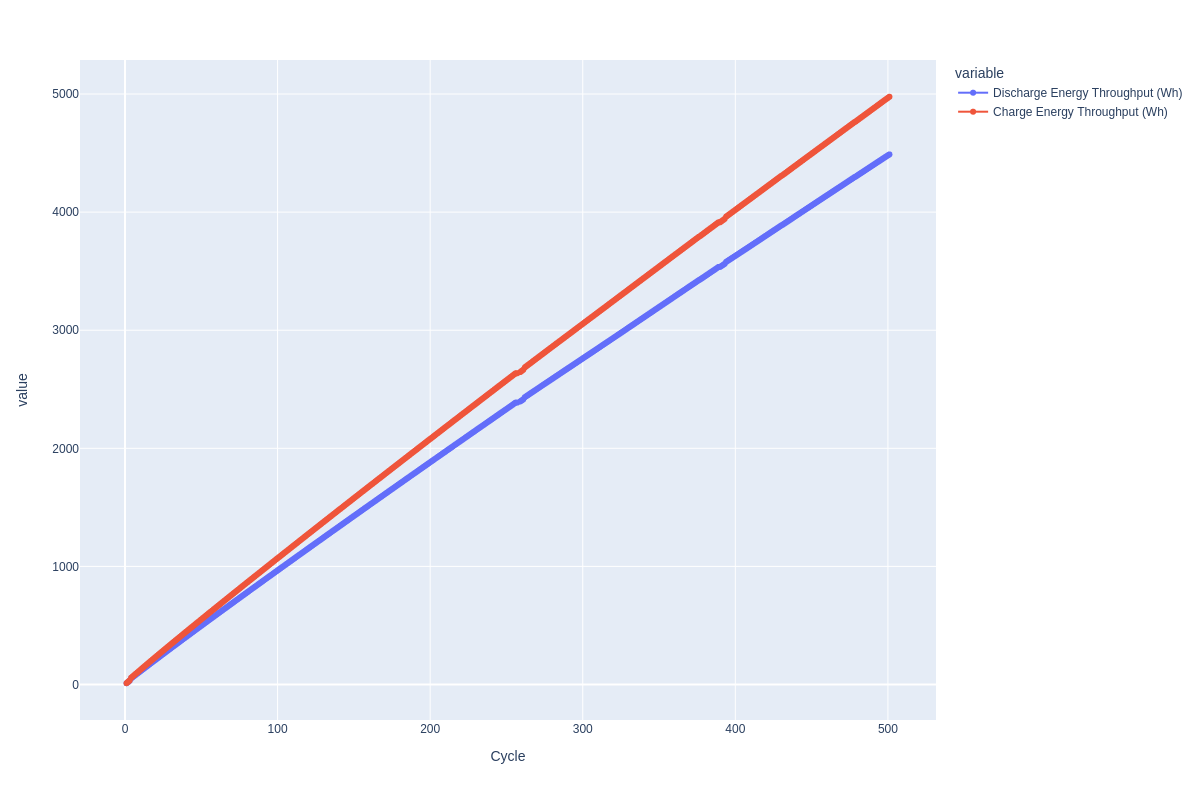

In [19]:
Image(filename='Energy_throughput_SNL_18650_NMC_35C_0-100_0.5-1C_a.png')

# Fun with Loc-i [Optional]

Interested in learning more about Python 0 indexing and some fun ways to work around it? Check out the supplemental demo called **Fun with Loc-i**. It is useful to help build intuition about Pandas Dataframes and how data can be retrieved and manipulated by label or index.

[Fun with Loc-i](https://colab.research.google.com/drive/1Hx_miNwE17nxj0BHAIX8X28q7f4p_6G8?usp=sharing
)



In [20]:
pdf = pd.DataFrame(data= {'colA': ["thor", 4], 'colB': ["valkyrie", 8]})
print("Data Frame:")
print(pdf)

Data Frame:
   colA      colB
0  thor  valkyrie
1     4         8


In [21]:
pdf = pd.DataFrame(data= {'colA': ["thor", 4], 'colB': ["valkyrie", 8]} , index=["row1", "row2"])
print("Data Frame:")
print(pdf)

Data Frame:
      colA      colB
row1  thor  valkyrie
row2     4         8


In [22]:
print("Select Row by Name:")
print(pdf.loc[["row1"]])

Select Row by Name:
      colA      colB
row1  thor  valkyrie


In [23]:
print("Select Row by Index:")
print(pdf.iloc[[0]])

Select Row by Index:
      colA      colB
row1  thor  valkyrie
